Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 65s 1ms/sample - loss: 1.1223 - acc: 0.7028 - val_loss: 0.3149 - val_acc: 0.9110
Epoch 2/20
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.2651 - acc: 0.9224 - val_loss: 0.2100 - val_acc: 0.9365
Epoch 3/20
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.1870 - acc: 0.9450 - val_loss: 0.1424 - val_acc: 0.9605
Epoch 4/20
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.1467 - acc: 0.9575 - val_loss: 0.1195 - val_acc: 0.9657
Epoch 5/20
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.1225 - acc: 0.9640 - val_loss: 0.0966 - val_acc: 0.9727
Epoch 6/20
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.1061 - acc: 0.9689 - val_loss: 0.0832 - val_acc: 0.9753
Epoch 7/20
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0937 - acc: 0.9722 - val_loss: 0.

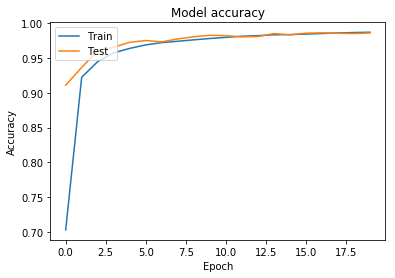

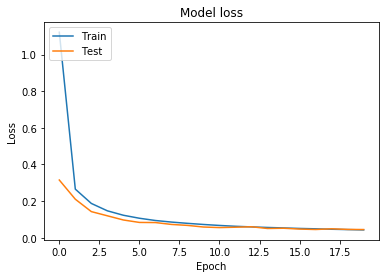

In [7]:
import tensorflow as tf
#import keras
from tensorflow.python import keras
#from keras.datasets import mnist
from tensorflow.python.keras.datasets import mnist
#from keras.models import Sequential
from tensorflow.python.keras.models import Sequential
#from keras.layers import Dense ,Flatten,Conv2D,MaxPooling2D
from tensorflow.python.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
#from keras import backend as K
from tensorflow.python.keras import backend as K
import matplotlib.pyplot as plt

num_classes=10
img_rows,img_cols=28,28

#trainX是60000x28x28的数组，trainY是每张图片对应的数字
(trainX,trainY),(testX,testY)=mnist.load_data()

#由于不同底层对输入要求不一样，根据图像编码格式的要求来设置输入层的格式
if K.image_data_format()=='channels_first':
    trainX=trainX.reshape(trainX.shape[0],1,img_rows,img_cols)
    testX=testX.reshape(testX.shape[0],1,img_rows,img_cols)
    #单通道，通道数在前
    input_shape=(1,img_rows,img_cols)
else:
    trainX=trainX.reshape(trainX.shape[0],img_rows,img_cols,1)
    testX=testX.reshape(testX.shape[0],img_rows,img_cols,1)
    #单通道图片，通道数在后
    input_shape=(img_rows,img_cols,1)

#将图片像素值化为(0,1)之间
trainX=trainX.astype('float32')
testX=testX.astype('float32')
trainX/=255.0
testX/=255.0

trainY=keras.utils.to_categorical(trainY,num_classes)
testY=keras.utils.to_categorical(testY,num_classes)

#构建网络，两个卷积、两个最大池化、两个全连接层
model=Sequential()
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

#配置tf.Session运算方式
config=tf.ConfigProto(device_count={"CPU":6})
#按需占用
config.gpu_options.allow_growth=True

session=tf.Session(config=config)
K.set_session(session)




#指定模型损失函数(交叉熵损失函数)、优化器、评估原则
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.SGD(),metrics=['accuracy'])
#训练模型
history=model.fit(trainX,trainY,batch_size=128,epochs=20,validation_split=0.1,validation_data=(testX,testY))

#绘制训练/验证的准确率值
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#绘制训练/验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()
